In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [83]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

moons = make_moons(n_samples=1000, shuffle=True, noise=0.5)
X_train, X_val, y_train, y_val = train_test_split(moons[0], moons[1])

In [68]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [69]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

LogisticRegression 0.792
RandomForestClassifier 0.784
SVC 0.796
VotingClassifier 0.788


In [70]:
svm_proba_clf = SVC(probability=True)

voting_soft_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_proba_clf)],
    voting='soft'
)

In [71]:
voting_soft_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [72]:
for clf in (log_clf, rnd_clf, svm_proba_clf, voting_soft_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

LogisticRegression 0.792
RandomForestClassifier 0.804
SVC 0.796
VotingClassifier 0.796


Bagging and Pasting Classifiers

In [73]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_val)

In [74]:
accuracy_score(y_val, y_pred)

0.8

We can use Out-of-Bag evaluation (oob) to request an automatic oob evaluation after training

In [77]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True
)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.7933333333333333

In [78]:
y_pred = bag_clf.predict(X_val)
accuracy_score(y_val, y_pred)

0.804

In [80]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_val)
accuracy_score(y_val, y_pred_rf)

0.796

The following BaggingClassifier is equivalent to the previous RandomForestClassifier

In [81]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="auto", max_leaf_nodes=16), 
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
)

Feature importance from Random Forests

In [85]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10475225514018464
sepal width (cm) 0.024100846174120987
petal length (cm) 0.422738034996322
petal width (cm) 0.4484088636893724


In [89]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [90]:
y_pred_ab = ada_clf.predict(X_val)
accuracy_score(y_val, y_pred_ab)

0.8

Gradient Boosting using DecisionTreeRegressor

In [91]:
import numpy as np

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

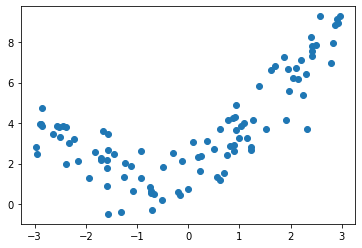

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.show()

In [92]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [93]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [94]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [125]:
y_pred = sum(tree.predict([[0.1]]) for tree in (tree_reg1, tree_reg2, tree_reg3))

This code generates the same ensemble as in the previous example but using GradientBoostingRegressor

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)
gbrt.predict([[0.1]])

/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2.17336784])

To avoid overfitting due to excesive estimators, we can find the optimal number of trees with early stopping

In [133]:
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=2, n_estimators=120)

In [134]:
#staged_predict returns an iterator over the predictions made by the ensemble at each stage of training
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1
errors[bst_n_estimators], bst_n_estimators

(0.960728450336594, 37)

In [140]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=2, n_estimators=37)

Instead of training a large number of trees first and then look back to find the optimal number, early stopping by actially stopping training can be done using warm_start=True

In [157]:
#Stochastic Gradient Boosting uses the subsample hyperparameter
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, subsample=0.5)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train.ravel())
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            print("Break with " + str(n_estimators))
            break

Break with 32


In [154]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(early_stopping_rounds=2)
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:2.98575
[1]	validation_0-rmse:2.29845
[2]	validation_0-rmse:1.76791
[3]	validation_0-rmse:1.45571
[4]	validation_0-rmse:1.27174
[5]	validation_0-rmse:1.16352
[6]	validation_0-rmse:1.09964
[7]	validation_0-rmse:1.09403
[8]	validation_0-rmse:1.09806
